In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import random
import seaborn as sns

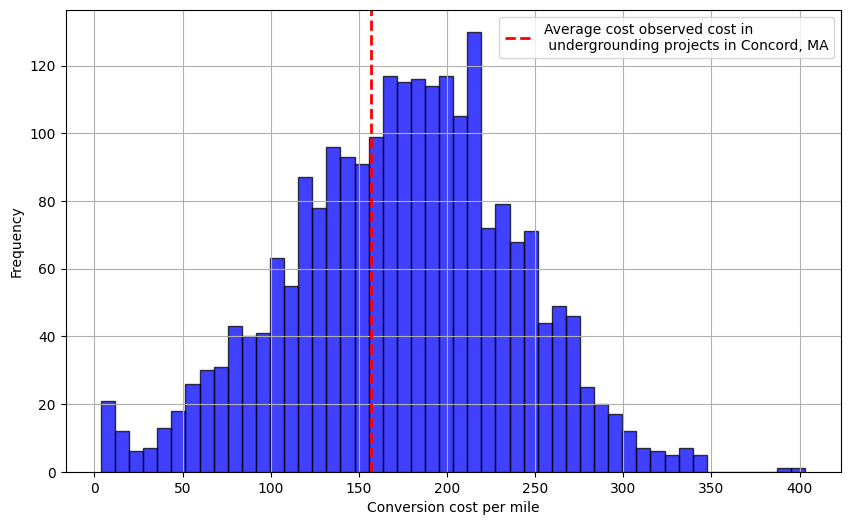

In [3]:
np.random.seed(10101)
random.seed(10102)


# Given data
log_clay_probability = [0.0005, 0.1649, 0.0202, 0.0002, 0.0667, 0.0078, 0.397, 0.2282, 0.0401, 0.0714, 0.003]
log_clay = [0, 0.301, 0.602, 0.663, 0.732, 0.778, 0.845, 0.863, 0.903, 0.954, 0.978]

log_density_mu = -1.55
log_density_sigma = 0.76

binom_3_phase = 0.4
binom_1_phase = 0.6

# Number of line segments
num_segments = 2299

# Generate random samples for each variable
phases = np.random.binomial(1, binom_3_phase, num_segments)
densities = np.random.normal(log_density_mu, log_density_sigma, num_segments)
clays = np.random.choice(log_clay, num_segments, p=log_clay_probability)

# Model coefficients
coeff_phase = -63.7480
coeff_density = -61.4211
coeff_clay = 136.8115

# Calculate the conversion cost for each line segment
conversion_costs = (coeff_phase * phases + 
                    coeff_density * densities + 
                    coeff_clay * clays)

# Ensure no conversion costs are less than zero
conversion_costs = np.maximum(conversion_costs, 3.6789975)

# Plot the histogram and the average line
plt.figure(figsize=(10, 6))
plt.hist(conversion_costs, bins=50, alpha=0.75, color='b', edgecolor='black')
plt.axvline(157, color='r', linestyle='dashed', linewidth=2, label='Average cost observed cost in \n undergrounding projects in Concord, MA')
plt.xlabel('Conversion cost per mile')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


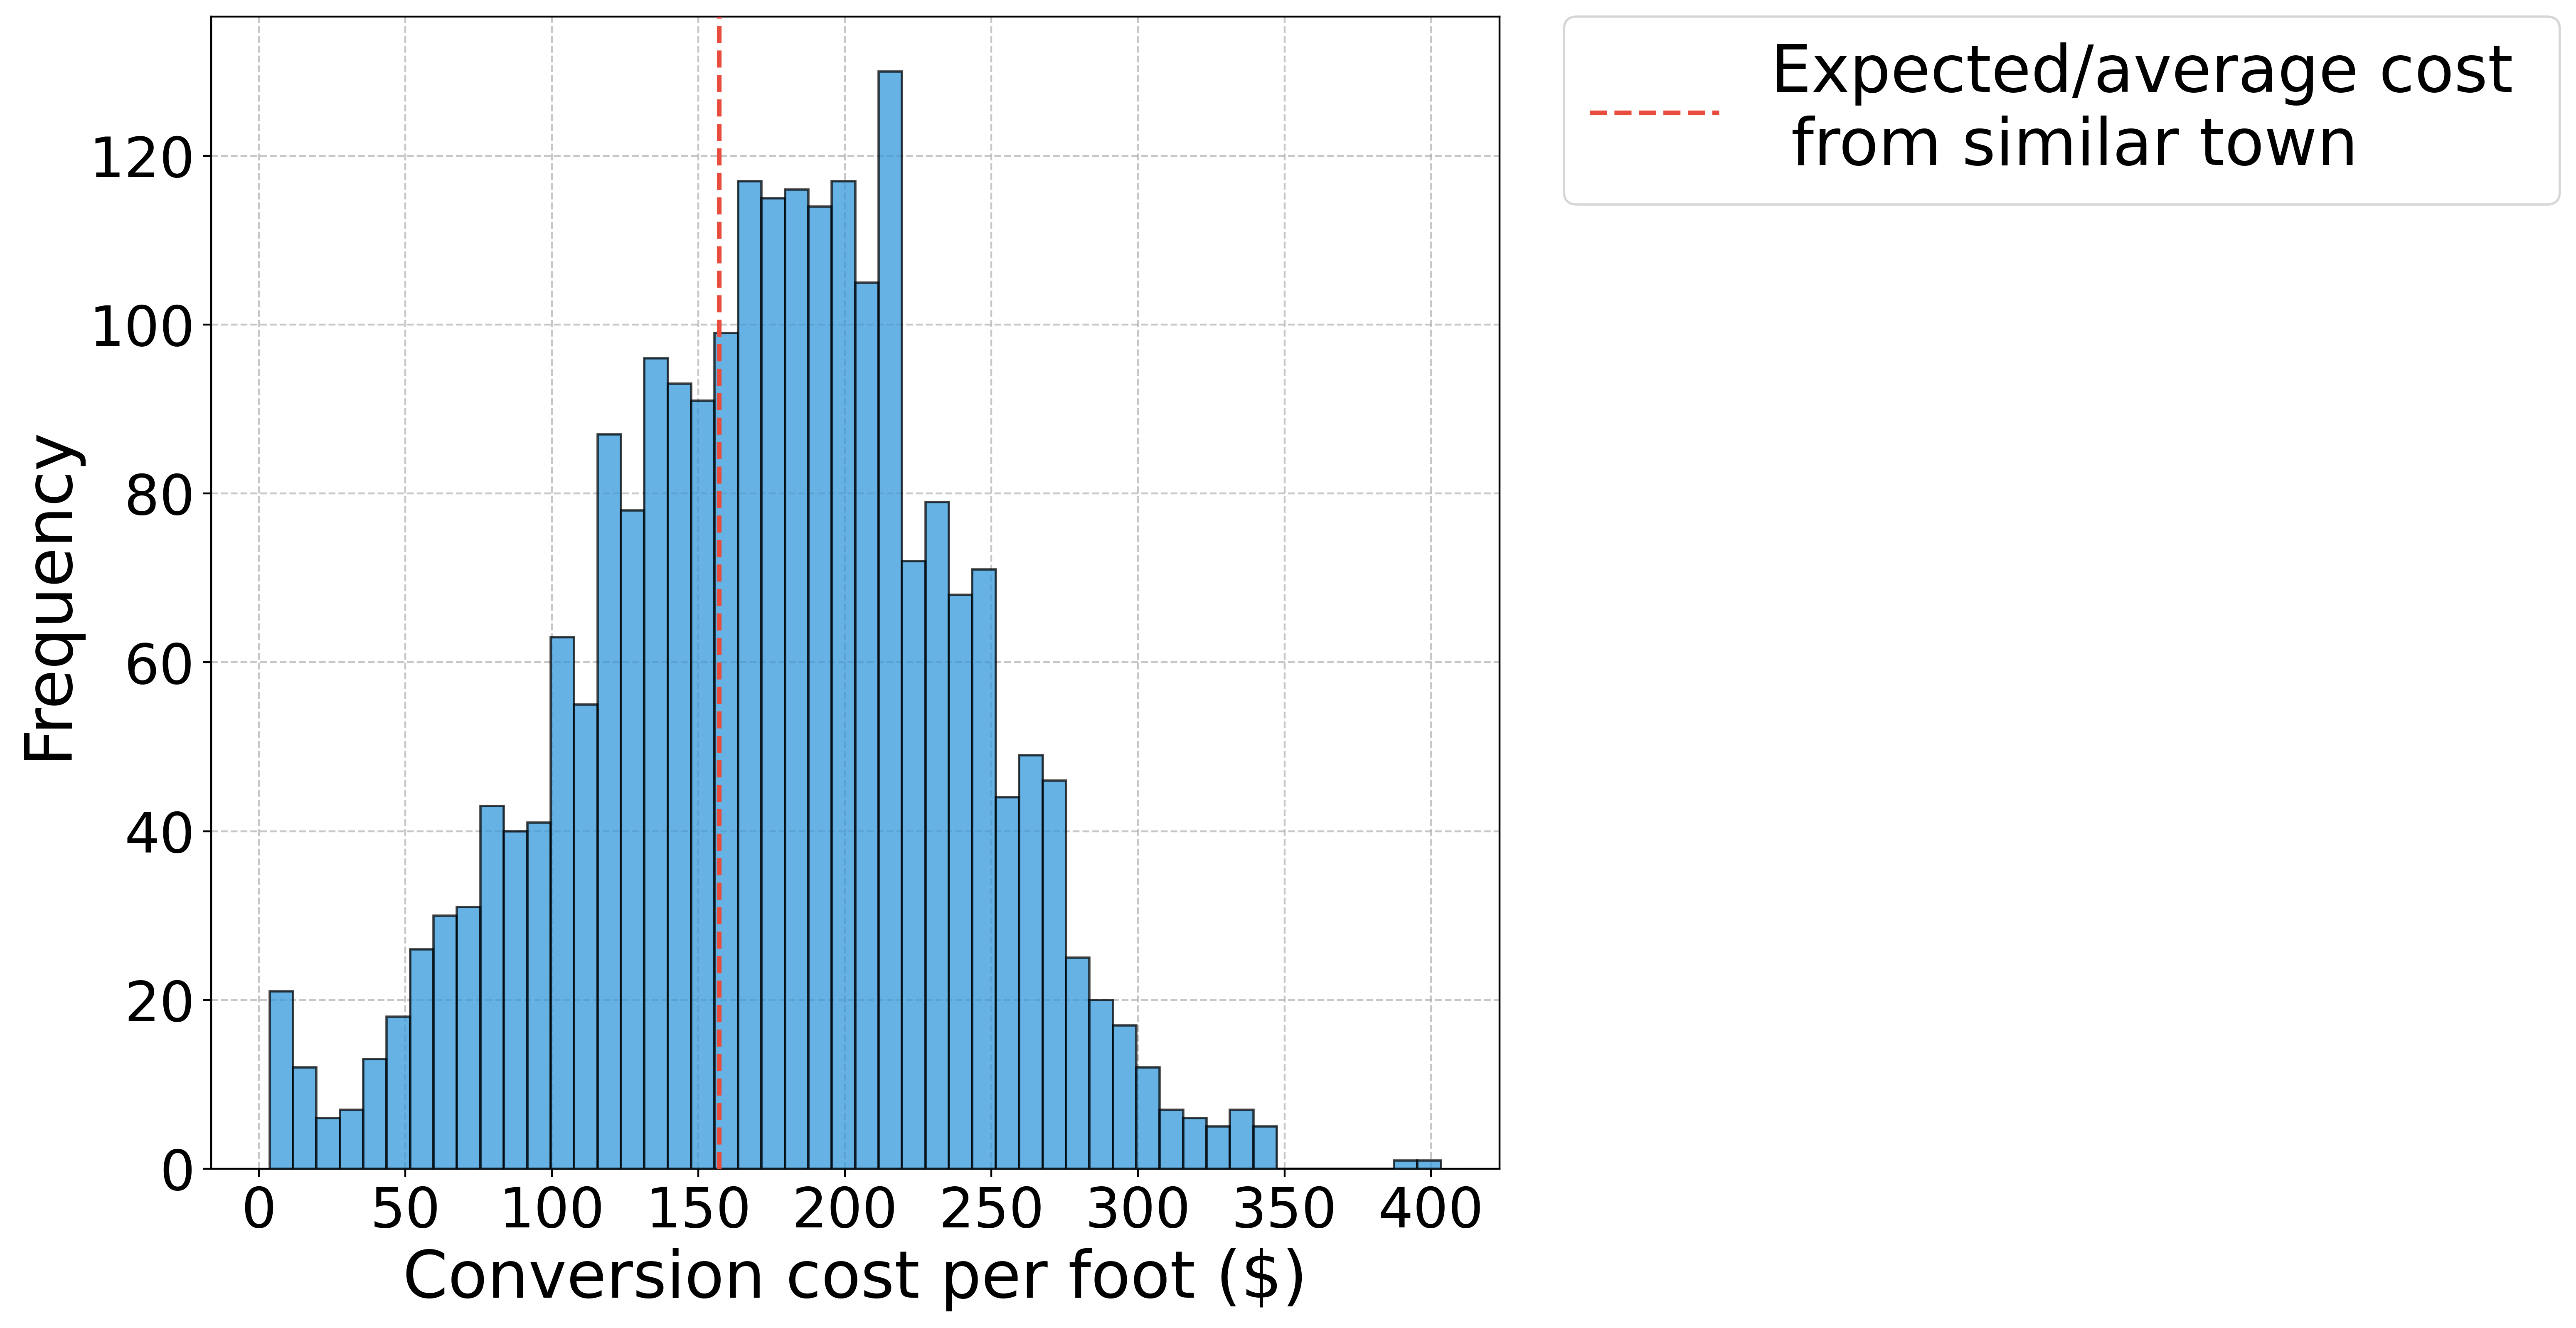

In [5]:
# Set random seeds
np.random.seed(10101)
random.seed(10102)

# Given data
log_clay_probability = [0.0005, 0.1649, 0.0202, 0.0002, 0.0667, 0.0078, 0.397, 0.2282, 0.0401, 0.0714, 0.003]
log_clay = [0, 0.301, 0.602, 0.663, 0.732, 0.778, 0.845, 0.863, 0.903, 0.954, 0.978]

log_density_mu = -1.55
log_density_sigma = 0.76

binom_3_phase = 0.4
binom_1_phase = 0.6

# Number of line segments
num_segments = 2299

# Generate random samples for each variable
phases = np.random.binomial(1, binom_3_phase, num_segments)
densities = np.random.normal(log_density_mu, log_density_sigma, num_segments)
clays = np.random.choice(log_clay, num_segments, p=log_clay_probability)

# Model coefficients
coeff_phase = -63.7480
coeff_density = -61.4211
coeff_clay = 136.8115

# Calculate the conversion cost for each line segment
conversion_costs = (coeff_phase * phases + 
                    coeff_density * densities + 
                    coeff_clay * clays)

# Ensure no conversion costs are less than zero
conversion_costs = np.maximum(conversion_costs, 3.6789975)

# Plot the histogram and the average line
plt.figure(figsize=(10, 9), dpi=400)
plt.hist(conversion_costs, bins=50, alpha=0.75, color='#3498db', edgecolor='black', zorder=3)
plt.axvline(157, color='#e74c3c', linestyle='dashed', linewidth=2, zorder=4 ,label='Expected/average cost \n from similar town')
plt.xlabel('Conversion cost per foot ($)', fontsize=28)
plt.ylabel('Frequency', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.legend(fontsize=18)
plt.legend(fontsize=28, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend(fontsize=20, bbox_to_anchor=(1, 1), loc='upper left')

#plt.title('Histogram of Conversion Costs', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [6]:
negative_conversion_costs = conversion_costs[conversion_costs < 0]
negative_conversion_costs

array([], dtype=float64)

In [7]:
# Calculate the average value of the histogram
average_conversion_cost = np.mean(conversion_costs)
average_conversion_cost

174.14029530545673

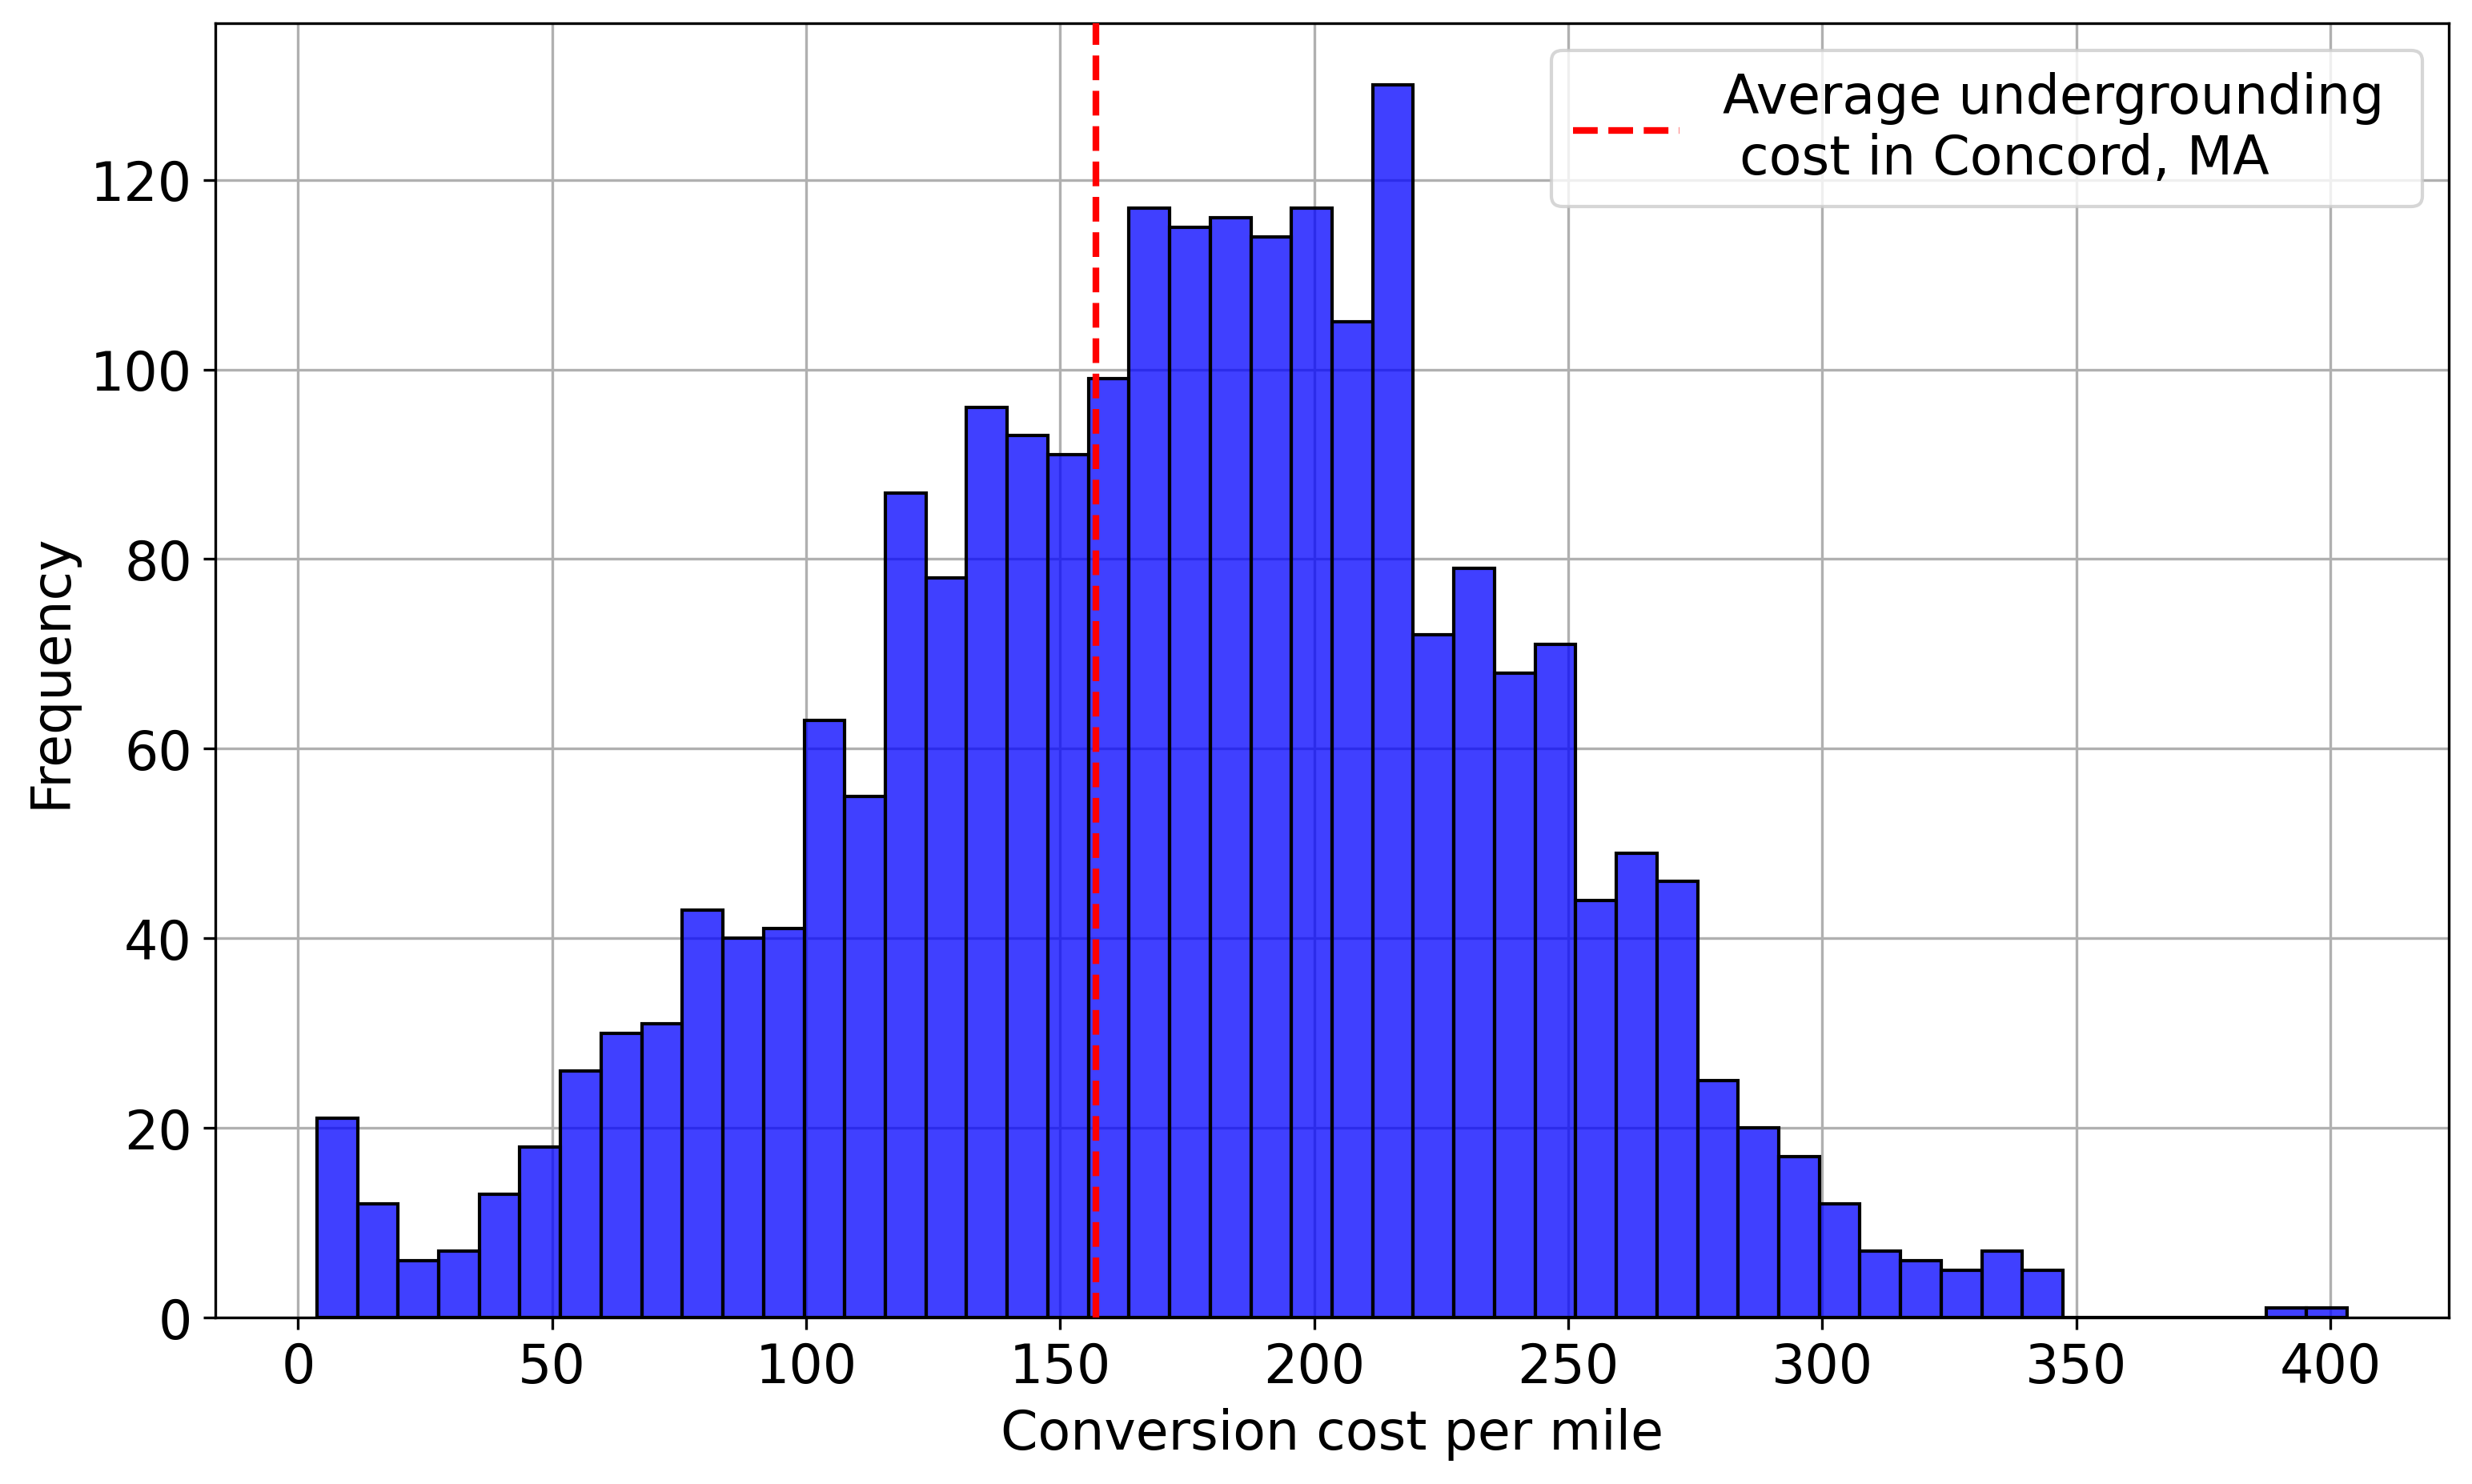

In [113]:
# Create the plot
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)
sns.histplot(conversion_costs, bins=50, alpha=0.75, color='b', edgecolor='black', ax=ax, zorder=3)

# Add average line
ax.axvline(157, color='r', linestyle='dashed', linewidth=2, label='Average undergrounding \n cost in Concord, MA', zorder=5)

# Set labels
ax.set_xlabel('Conversion cost per mile', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=16)

# Bring grid lines to back
ax.grid(True, zorder=0)

# Add legend
ax.legend(fontsize=16)

# Save the plot
plt.savefig(r'../../figures/conversion_costs.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Show the plot
plt.show()


In [97]:
### Calculate the total cost difference
# Length of each line segment using gamma distribution
k = 0.711
theta = 0.019
lengths = gamma.rvs(a=k, scale=theta, size=num_segments)

#lengths_sum= 55.43

# Calculate total cost using the regression model
total_cost_regression = np.sum(conversion_costs*lengths)

# Calculate total cost using the average
#mean_conversion_cost_array = np.full(num_segments, np.mean(conversion_costs))
avg_concord_cost=157
mean_conversion_cost_array = np.full(num_segments,avg_concord_cost)
total_cost_average= np.sum(mean_conversion_cost_array*lengths)

# Calculate the percentage difference
#percentage_difference = ((total_cost_average - total_cost_regression) / total_cost_regression) * 100
percentage_difference = ((total_cost_regression - total_cost_average) / total_cost_regression) * 100


# Output the percentage difference
print(f"The percentage difference in total cost is {percentage_difference:.2f}%")

The percentage difference in total cost is 10.72%


In [98]:
total_cost_regression

5411.074790715369

In [99]:
total_cost_average

4831.207284797337